In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [43]:
from fastai.conv_learner import *
from sklearn.metrics import confusion_matrix
from fastai.plots import plot_confusion_matrix

#### Define parameters and data

In [3]:
PATH = '../data/'
sz = 48
bs = 128
arch = resnet34
aug_tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on)
data = ImageClassifierData.from_paths(PATH, tfms=aug_tfms, bs=bs, test_name='test',
                                      test_with_labels=True)

#### Finetune last layer

In [4]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 28/28 [00:02<00:00, 10.40it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 89%|████████▊ | 197/222 [00:05<00:00, 38.40it/s, loss=17.4]


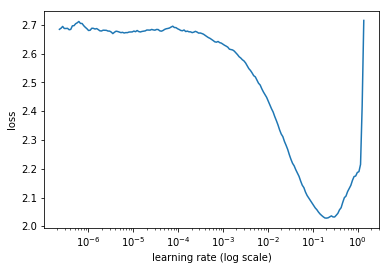

In [5]:
learn.lr_find(start_lr=1e-7)
learn.sched.plot()

In [6]:
learn.fit(0.05, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.369388   1.256282   0.530965  
    1      1.359366   1.253339   0.532383                   
    2      1.25721    1.199674   0.562739                   
    3      1.299791   1.215487   0.556488                   
    4      1.231188   1.18997    0.574089                   
    5      1.176893   1.170286   0.580674                   
    6      1.171169   1.160815   0.585328                   



[1.1608151, 0.5853276870080403]

In [5]:
learn.save('resnet34_last_1')

In [6]:
learn.load('resnet34_last_1')

In [7]:
learn.precompute = False
learn.unfreeze()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 87%|████████▋ | 194/222 [00:41<00:05,  4.68it/s, loss=10.3]

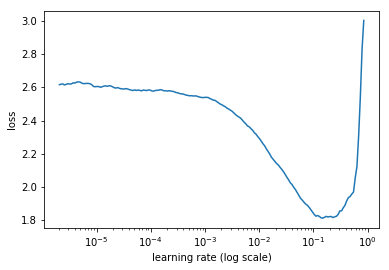

In [8]:
learn.lr_find(start_lr=1e-6)
learn.sched.plot()

In [9]:
lr = 1e-2
lrs = [lr/9, lr/3, lr]
learn.fit(lrs, 2, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

 15%|█▌        | 34/222 [00:08<00:46,  4.04it/s, loss=2.45]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                   
    0      1.135101   0.960819   0.669188  
    1      0.945945   0.901674   0.68286                     
    2      0.868868   0.786558   0.727736                    
    3      0.752147   0.759388   0.74104                     



[0.759388, 0.7410397870200021]

In [10]:
log_preds, y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)

[[0.58 0.   0.   0.   0.09 0.24 0.04 0.05]
 [0.04 0.   0.   0.   0.11 0.74 0.07 0.04]
 [0.43 0.   0.   0.   0.09 0.22 0.17 0.09]
 [0.06 0.   0.   0.17 0.08 0.27 0.05 0.37]
 [0.03 0.   0.   0.   0.82 0.09 0.02 0.03]
 [0.01 0.   0.   0.   0.05 0.87 0.05 0.02]
 [0.04 0.   0.   0.01 0.09 0.51 0.34 0.02]
 [0.03 0.   0.   0.   0.04 0.15 0.   0.77]]


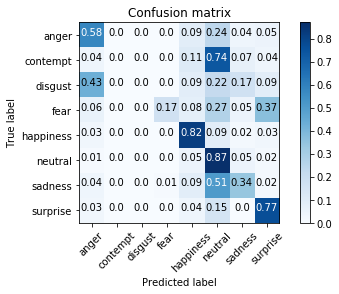

In [52]:
cm = confusion_matrix(y, probs.argmax(axis=1))
cm = np.round(cm / cm.sum(axis=1)[:, None], 2)
plot_confusion_matrix(cm, data.classes)

In [53]:
learn.save('resnet34_all')